# Exploratory Data Analysis

Definition of EDA:

Exploratory Data Analysis(EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

Some reasons why EDA is necessary:

* Initial investigations of the data reveal many underlying patterns and insights.
* To know datatypes we are operating on.
* Null value treatment.
* Outlier Detection.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

In [12]:
# import required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot stylings
plt.style.use('fivethirtyeight')
%matplotlib inline

# do not display warnings in notebook 
import warnings
warnings.filterwarnings('ignore')

#### Reading data 

> We use [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to read csv files.

In [13]:
# read the input file
data = pd.read_csv("../data/titanic/train.csv")

In [14]:
# display the first rows in the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# get the shape of the dataframe
data.shape

(891, 12)

### Null Value treatment

> Missing values in data is a common phenomenon in real world problems. Knowing how to handle missing values effectively is a required step to **reduce bias** and to build better models.

In [17]:
# check for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Only the 'Age' and 'Cabin' columns have missing values.
* Out of the 891 samples, 687 samples have missing 'Cabin' values. Imputing this value is of less use since it adds a lot of bias in the training data.

### Value Count plots

> Plotting value counts gives us the class or categorical distribution of the data. Not taking class imbalance into account results in poorly generalized model.

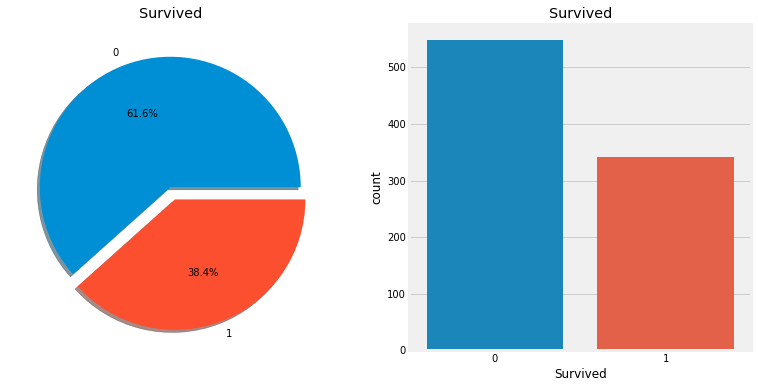

In [30]:
f,ax=plt.subplots(1,2,figsize=(12,6))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

* 38.4% of the passengers aboard survived the crash.

## Categorical and Continuous Features

Types of features:

> **Categorical Features**: A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

> **Continous Feature**: A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

### Categorical Features

* Value counts is a necessary tool while operating on categorical features.
* Other useful graphical tools for analyzing categorical data is a bar graphs, histograms.

#### Categorical Feature - Sex

In [18]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

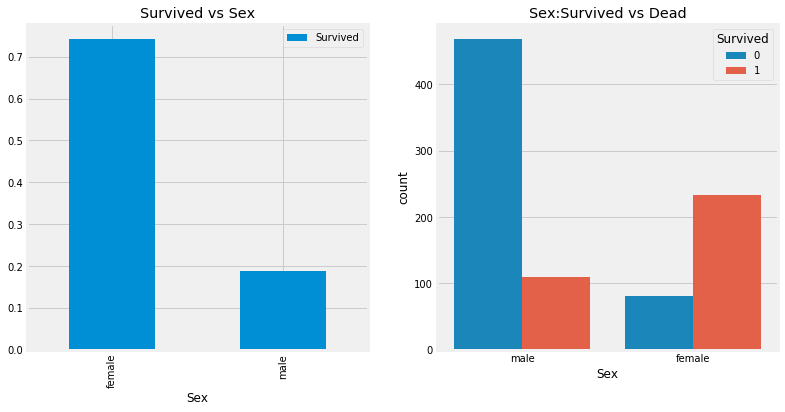

In [19]:
f,ax=plt.subplots(1,2,figsize=(12,6))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

* Survival ratio for females is much greater than that of males.

#### Categorical Feature - Pclass

[pd.crosstab](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html): 
> Compute a simple cross-tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed

Cross tabulation is used to quantitatively(generally based on frequency) analyze the relationship between multiple variables.

Survival rate with 'Sex' and 'Pclass' together

In [20]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


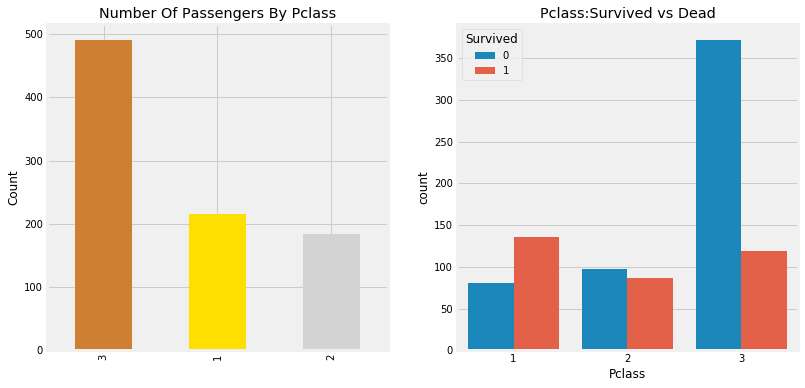

In [21]:
f,ax=plt.subplots(1,2,figsize=(12,6))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [22]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

#### Factor Plots :

> A factor plot is simply the plot generated for a value with variables and arranged on a single axis.

Here, from the below factor plots we can see the survival rates of passengers in differrent classes broken down by gender.

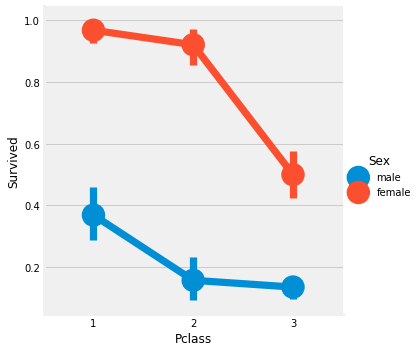

In [23]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

### Continuous Feature - Age

Continuous feature are dealt differently than categorical features:
* Minimum Value and Maximum Value.
* Mean, Mode and Meadian analysis.
* Histogram plots and Violin plots.

In [24]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [25]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


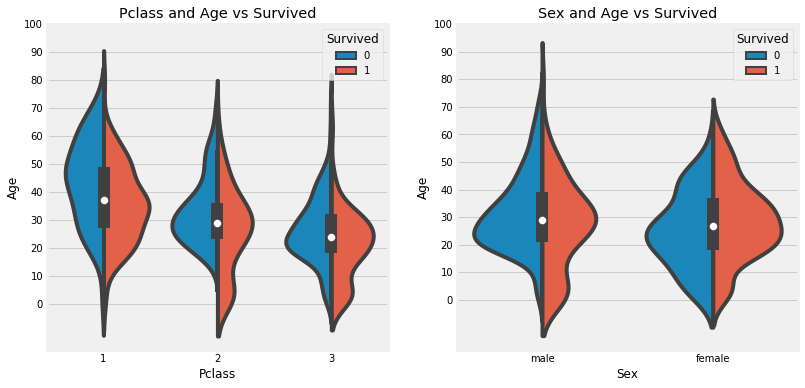

In [26]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Violin Plots:

> [**Violin Plots**](https://en.wikipedia.org/wiki/Violin_plot): A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated probability density plot on each side.

#### Histogram Plots:
> Histogram plot show the underlying frequency distribution of a continuous varible. The continuous variables in divided into bins and the frequency of data points the corresponding bins are plotted.

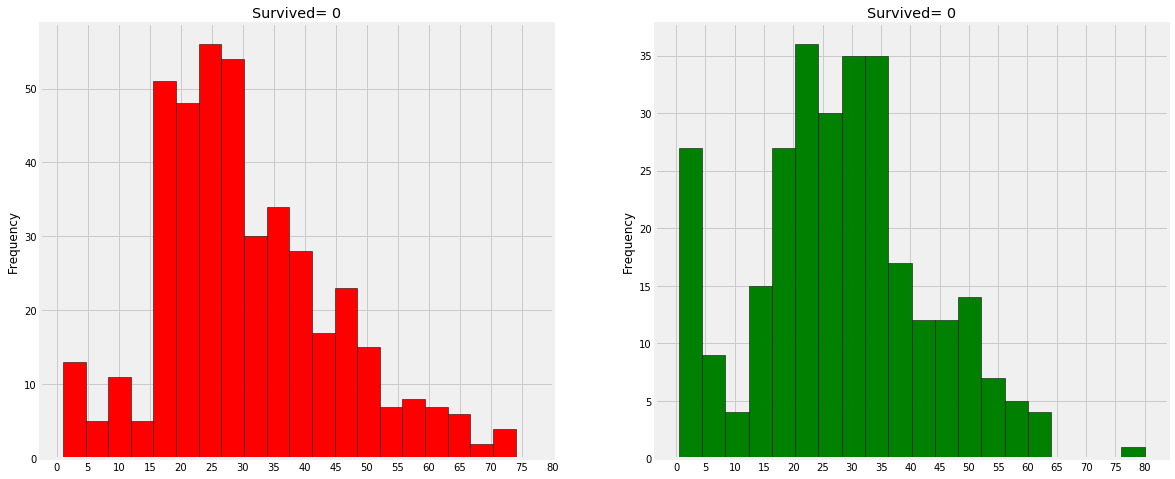

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 0')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()